<h1>Exploratory data analysis EDA </h1>
<p>It is process of analyzing data sets to summarize their main characteristics. It is often done by data visualization.</p>
<p> In this example, I am trying to find which feature has the greatest impact on surviving a Titanic Disaster </p>
<p> We have some numerical data, categorical variables and just text variables </p>
<p> I will check whether the data set have missing values or not. If yes I will decide to drop or fill those. </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p> finding missing data </p>

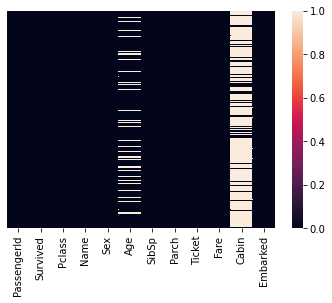

In [4]:
sns.heatmap(train.isnull(), yticklabels=False);

<p> in my opinion there are to many data missing for cabin column so I will probably drop this one. If we speak about age column there are some null values but i think we can calculate this one. </p>

<p> Bunch of bar plots to determine which of columns might be important </p>

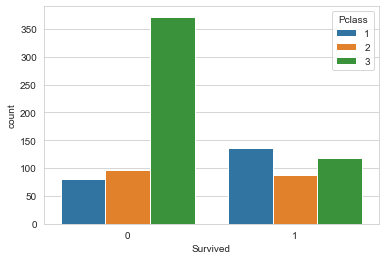

In [5]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data=train);

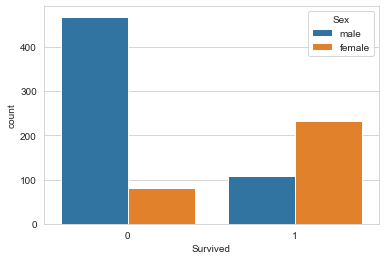

In [6]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data=train);

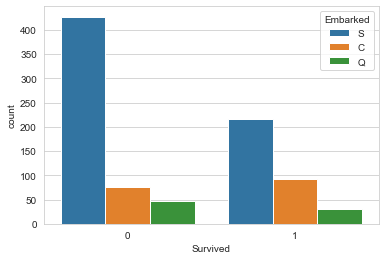

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Embarked", data=train);

<p> Better the ticket, greater the chances of surviving. Same thing if we compare sex. More woman survived. </p>

<p> Bunch of histograms for better view on data </p>

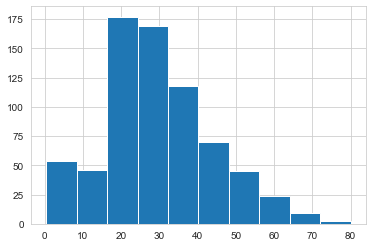

In [8]:
train['Age'].hist();

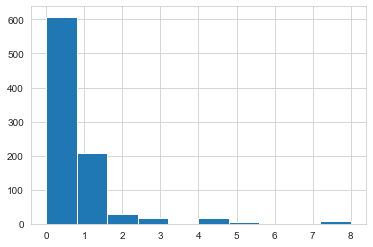

In [9]:
train['SibSp'].hist();

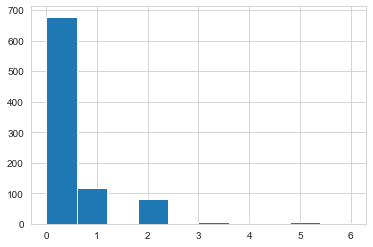

In [10]:
train['Parch'].hist();

<p> We have some missing data in age column so maybe we can figure it out how can you fill these nulls. </p>

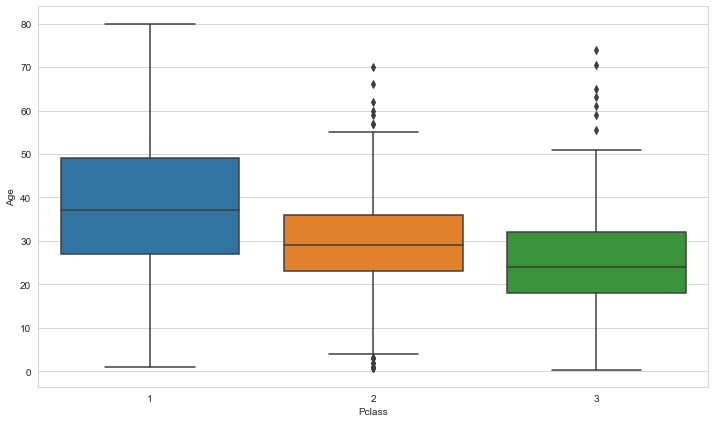

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age", data=train);

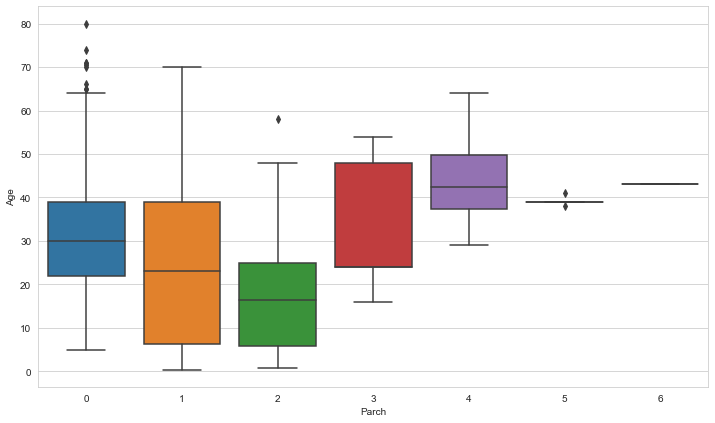

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Parch", y="Age", data=train);

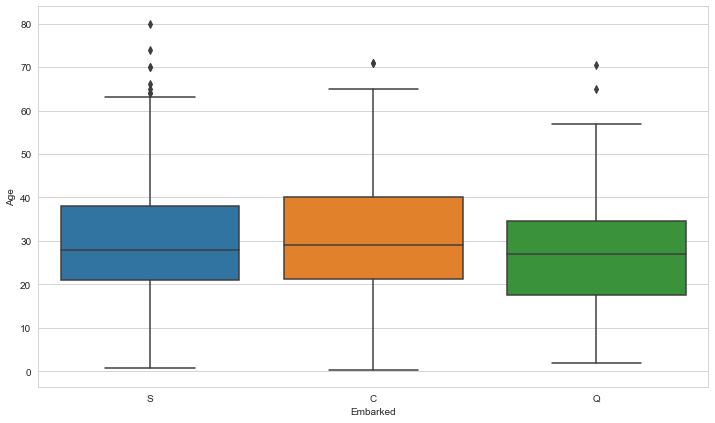

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Embarked", y="Age", data=train);

<p> We will try to calculate missing age based on ticket. </p> 

In [14]:
class_age = train.groupby('Pclass')['Age'].median().to_dict()

In [15]:
def update_Age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        age = class_age[pclass]
    return age  

In [16]:
train['Age'] = train[['Age',"Pclass"]].apply(update_Age,axis=1)

</p> Let's see the missing data now </p>

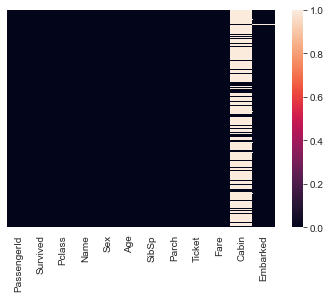

In [17]:
sns.heatmap(train.isnull(), yticklabels=False);

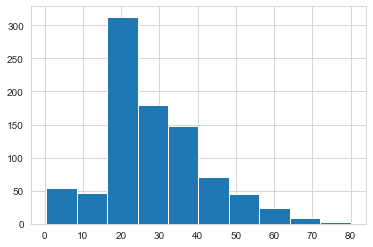

In [18]:
train['Age'].hist();

<p> We filled age column without major change of data distribution </p>

In [19]:
train.drop("Cabin", axis=1,inplace=True)
train = train.dropna()

In [20]:
train.isnull().sum(axis = 0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<p> Now we need to changed string data into numbers </p>

In [21]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [22]:
train = train.drop(['Sex','Embarked','Name','Ticket'], axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [24]:
train = pd.concat([train, sex, embark], axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


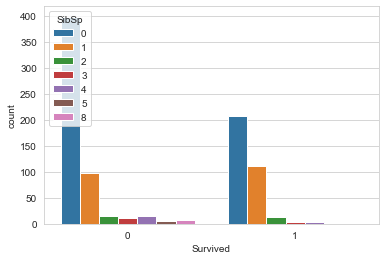

In [26]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="SibSp", data=train);

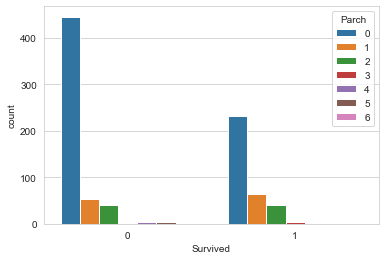

In [27]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Parch", data=train);

In [29]:
train["Family"] = train.SibSp + train.Parch + 1
train.drop(['SibSp','Parch'], axis=1, inplace=True)

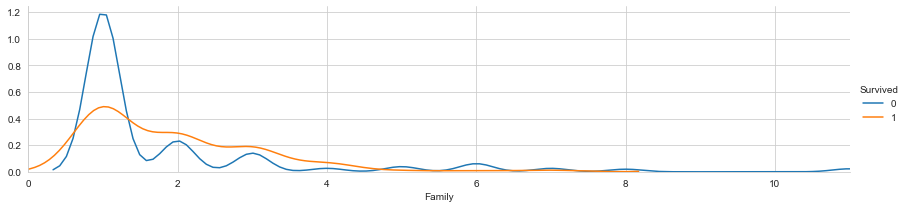

In [30]:
grid = sns.FacetGrid(train,hue="Survived", aspect=4)
grid.map(sns.kdeplot,"Family")
grid.set(xlim=(0,train.Family.max()))
grid.add_legend()
plt.xlim(0)
plt.show()

<p> sibsp - Number of Siblings/Spouses Aboard <br>
    parch - Number of Parents/Children Aboard <br>
    sibsp and parch store similar data with similar distributions. I think we can combine them in one value such as family.
</p>

<p> The better the ticket we have, the higher the fare will be. So maybe we can give up one column because they represent similar things. </p>

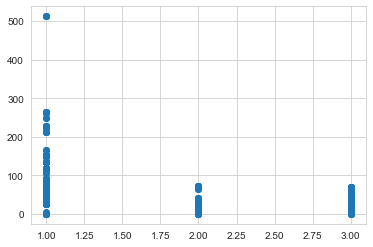

In [33]:
plt.plot(train.Pclass,train.Fare,'o');

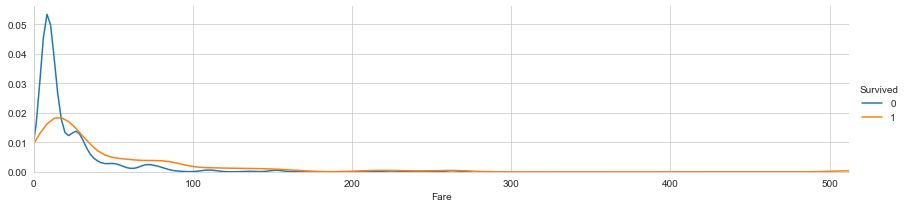

In [34]:
grid = sns.FacetGrid(train,hue="Survived", aspect=4)
grid.map(sns.kdeplot,"Fare")
grid.set(xlim=(0,train.Fare.max()))
grid.add_legend()
plt.show()

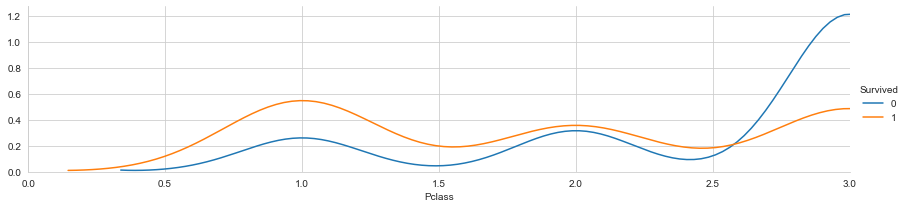

In [35]:
grid = sns.FacetGrid(train,hue="Survived", aspect=4)
grid.map(sns.kdeplot,"Pclass")
grid.set(xlim=(0,train.Pclass.max()))
grid.add_legend()
plt.show()

<p> Pclass = 1 means better ticket and bigger Fare. For Pclass 2 and 3 Fare won't be bigger than 100. I think column Fare on its own has less information than Pclass and if we want to use fare we will need to scale it. I think it is save to drop this column. </p>

In [36]:
train.drop(['Fare'], axis=1, inplace=True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Age,male,Q,S,Family
0,1,0,3,22.0,1,0,1,2
1,2,1,1,38.0,0,0,0,2
2,3,1,3,26.0,0,0,1,1
3,4,1,1,35.0,0,0,1,2
4,5,0,3,35.0,1,0,1,1


<p> We still need to scale age </p>

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_age = np.array(train.Age).reshape(-1,1)
scale_age = scaler.fit_transform(scale_age);
train["Age"] = scale_age

In [39]:
train.head()

,PassengerId,Survived,Pclass,Age,male,Q,S,Family
0,1,0,3,-0.531670,1,0,1,2
1,2,1,1,0.680232,0,0,0,2
2,3,1,3,-0.228695,0,0,1,1
3,4,1,1,0.453001,0,0,1,2
4,5,0,3,0.453001,1,0,1,1


<h1> Neural network </h1>

In [40]:
df_Y = train['Survived']
train.drop(['Survived'], axis=1, inplace=True)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(train,df_Y,test_size =0.2,random_state=4)

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
nn = MLPClassifier(activation='identity',solver='lbfgs',hidden_layer_sizes=(5,10),random_state=1, max_iter=1000,alpha=0.000001)
nn.fit(x_train,y_train);

In [44]:
print("Training set score: %f" % nn.score(x_train, y_train))
print("Testing set score: %f" % nn.score(x_test, y_test))

Training set score: 0.810127
Testing set score: 0.780899


<h1> Cross-validation </h1>

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
score = cross_val_score(nn,train,df_Y,cv=10)

In [47]:
j = 0
for i in score:
    print(str(j) + '. score: ' + str(i))
    j += 1
print('\nmean: ' + str(score.mean()))

0. score: 0.7865168539325843
1. score: 0.7865168539325843
2. score: 0.7752808988764045
3. score: 0.8426966292134831
4. score: 0.8314606741573034
5. score: 0.7865168539325843
6. score: 0.797752808988764
7. score: 0.7865168539325843
8. score: 0.797752808988764
9. score: 0.8068181818181818

mean: 0.7997829417773238
